In [2]:
import pandas as pd
import numpy as np

In [3]:
class_df = pd.read_csv(r'C:\Users\skous2\Box\Teaching\Winter 2024\IS 505\IS 505 Class Data.csv')
cleaned_class_df = pd.DataFrame(columns = ['favColor', 'sleepHours', 'toothbrush', 'waterCups',
                                            'phoneType', 'steps', 'languages', 'countries',
                                            'music', 'season', 'socialMedia', 'books', 'siblings',
                                            'instruments', 'mornOrNight', 'pets', 'eatOut'])

In [4]:
# What type of phone do you use?
phones = class_df.iloc[:,5]
phones = phones.str.capitalize()
cleaned_class_df['phoneType'] = phones
#cleaned_class_df['phoneType']

In [5]:
countries_visited = class_df.iloc[:,8]
countries_visited = countries_visited.replace(np.nan,'0')
countries_visited = countries_visited.replace('two','2')
countries_visited = countries_visited.replace('Three','3')
countries_visited = pd.to_numeric(countries_visited)
cleaned_class_df['countries'] = countries_visited


In [6]:
books = class_df['How many books do you read per year?']

books = books.str.strip('>')
books = books.fillna(0)
cleaned_class_df['books'] = [int(float(book)) for book in books]


In [7]:
cleaned = class_df['What is the color of your toothbrush'].str.title().str.split().str.get(0)
cleaned_class_df['toothbrush'] = cleaned


In [8]:
stepswalked = class_df.iloc[:,6]
stepswalked = stepswalked.str.lower().replace('idk','NaN')
stepswalked = stepswalked.str.replace(',','').replace('not really sure','NaN').replace(np.nan,'NaN')
cleaned_class_df['steps'] = [np.nan if steps == 'NaN' else int(steps) for steps in stepswalked]
#cleaned_class_df['steps']

In [9]:

new=class_df['How many hours of sleep do you get on average per night?'].dropna()
avg = new.mean()
new1 = class_df.iloc[:,2].replace(np.nan,avg)
cleaned_class_df['sleepHours'] = new1


In [10]:
social_media = class_df.iloc[:,-7]
social_media= social_media.str.replace('2-Jan','2')
social_media = social_media.astype(float)
cleaned_class_df['socialMedia'] = social_media


In [11]:
eat = class_df['How many times per week do you eat out?']
eat1 = []
eat2 = []
eat3 = []
for value in eat:
    if value.isnumeric():
        eat1.append(int(value))
    else:
        eat1.append(value)
        eat2.append(value)

eat1
eat2

for value in eat1:
    if value == "2-Jan":
        eat3.append(2)
    elif value == "0-2":
        eat3.append(1)
    elif value == '0.25':
        eat3.append(1)
    elif value == '2.5':
        eat3.append(3)
    else:
        eat3.append(value)

eat = pd.Series(eat3)
cleaned_class_df['eatOut'] = eat

In [12]:
df = class_df['What is your favorite genre of music?']

df = pd.Series([str(i)[str(i).find('(') + 1:str(i).find(')')] 
                if str(i).find('(') > 0 else i for i in df])
df = df.str.capitalize().str.strip()
df = df.fillna('No preference')
cleaned_class_df['music'] = df

In [13]:
season = class_df.iloc[:,-8]
season = season.str.lower()
season = season.str.strip()

for s, sea in enumerate(season):
    if sea == "autumn" or sea == 'nfl season':
        season[s] = "fall"

season_dict = season.value_counts().to_dict()
print(season_dict)
cleaned_class_df['season'] = season

{'fall': 21, 'summer': 21, 'spring': 12, 'winter': 3}


In [14]:
colors = class_df.iloc[:,1].str.lower().fillna('none')

cleaned_class_df['favColor'] = [col if col.find('blue') < 0 else 'blue' for col in colors]
#[col if col.find('blue') < 0 else 'blue' for col in colors]

In [15]:
cleaned_class_df['waterCups'] = class_df.iloc[:,4]

In [16]:
cleaned_class_df['languages'] = [int(num) for num in class_df.iloc[:, 7].str.replace('one','1').str.replace('Two','2').str.strip('<').str[0]]

In [17]:
cleaned_class_df['siblings'] = [int(sib) for sib in class_df.iloc[:,-5].fillna(0)]

In [18]:
cleaned_class_df['instruments'] = [int(inst) for inst in class_df.iloc[:,-4].fillna(0)]

In [19]:
time = []
for a in class_df.iloc[:,-3].str.lower().str.replace('morgnin', 'morning'):
    if a.find('night') >= 0:
        time.append('night')
    elif a.find('morning') >= 0:
        time.append('morning')
    else:
        time.append('both')
cleaned_class_df['mornOrNight'] = time

In [20]:
cleaned_class_df['pets'] = [int(pet) for pet in class_df.iloc[:,-2].fillna('0').str.replace('fish', '1').str.replace('zero','0')]

In [21]:
cleaned_class_df.head()

,favColor,sleepHours,toothbrush,waterCups,phoneType,steps,languages,countries,music,season,socialMedia,books,siblings,instruments,mornOrNight,pets,eatOut
0,white,5.0,Purple,8,Android,300.0,2,5,Percussion,winter,3.0,2,1,2,night,0,3
1,blue,7.5,White,8,Apple,NaN,2,5,No preference,spring,0.0,3,6,3,morning,0,1
2,green,7.0,Green,8,Apple,10000.0,1,6,Classical,spring,2.0,15,3,0,morning,0,2
3,blue,7.5,Green,8,Apple,10000.0,1,4,Pop,spring,2.0,5,3,2,morning,0,2
4,blue,7.5,Pink,6,Apple,7000.0,2,13,No preference,fall,1.0,5,3,1,morning,0,1


In [22]:
cleaned_class_df.to_csv('data/cleaned_class_data.csv', index=False)

In [23]:
numerics = list(cleaned_class_df.dtypes[(cleaned_class_df.dtypes == 'int64') 
                                        | (cleaned_class_df.dtypes == 'float64')].index)

In [24]:
cleaned_class_df[numerics].corr()

,sleepHours,waterCups,steps,languages,countries,socialMedia,books,siblings,instruments,pets,eatOut
sleepHours,1.000000,-0.085414,0.054442,0.107569,0.239089,-0.162430,-0.054299,-0.058832,-0.008768,0.028350,-0.059562
waterCups,-0.085414,1.000000,0.162138,-0.035364,-0.056466,0.006311,0.073540,0.206523,-0.039350,0.052267,0.179596
steps,0.054442,0.162138,1.000000,-0.179815,0.021768,-0.024477,0.008331,0.310545,-0.059160,-0.109646,-0.009476
languages,0.107569,-0.035364,-0.179815,1.000000,0.403096,-0.047323,-0.166022,0.020271,0.141084,0.097892,-0.044662
countries,0.239089,-0.056466,0.021768,0.403096,1.000000,0.026848,0.001403,-0.167453,0.027176,-0.077721,0.185580
socialMedia,-0.162430,0.006311,-0.024477,-0.047323,0.026848,1.000000,-0.104177,-0.202236,-0.140059,-0.114288,0.038014
books,-0.054299,0.073540,0.008331,-0.166022,0.001403,-0.104177,1.000000,0.005245,-0.093380,0.242373,-0.085521
siblings,-0.058832,0.206523,0.310545,0.020271,-0.167453,-0.202236,0.005245,1.000000,0.083756,0.019827,-0.152346
instruments,-0.008768,-0.039350,-0.059160,0.141084,0.027176,-0.140059,-0.093380,0.083756,1.000000,0.028495,-0.058466
pets,0.028350,0.052267,-0.109646,0.097892,-0.077721,-0.114288,0.242373,0.019827,0.028495,1.000000,-0.063941


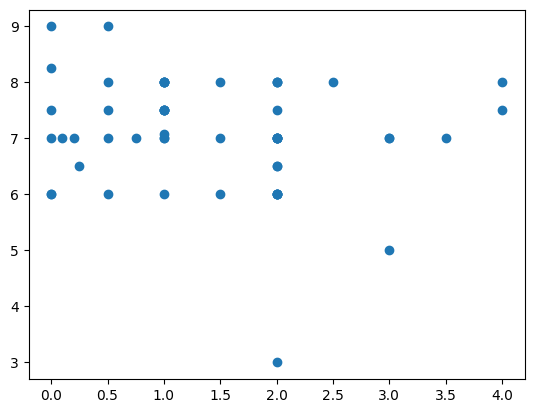

In [25]:
from matplotlib import pyplot as plt
from scipy import stats

plt.scatter(cleaned_class_df.socialMedia, cleaned_class_df.sleepHours);

In [26]:
stats.pearsonr(cleaned_class_df.socialMedia, cleaned_class_df.sleepHours)

PearsonRResult(statistic=-0.1624298087940876, pvalue=0.22736061462180684)

In [27]:
stats.pearsonr(cleaned_class_df.languages, cleaned_class_df.countries)

PearsonRResult(statistic=0.4030957209241812, pvalue=0.001877586997492103)

PearsonRResult(statistic=0.2423732976551357, pvalue=0.06928935007674598)


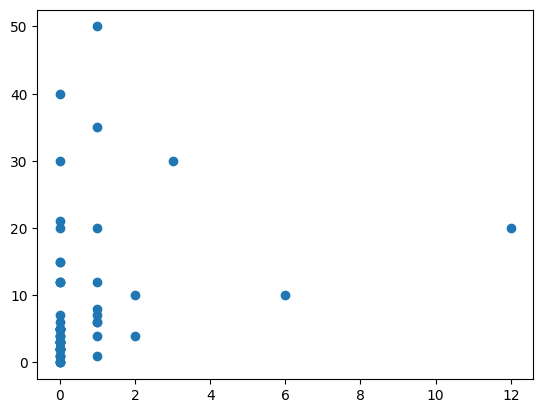

In [28]:
print(stats.pearsonr(cleaned_class_df.pets, cleaned_class_df.books))
plt.scatter(cleaned_class_df.pets, cleaned_class_df.books);


In [29]:
nonulls = cleaned_class_df.dropna()

PearsonRResult(statistic=0.31054477623639326, pvalue=0.0426840620971659)


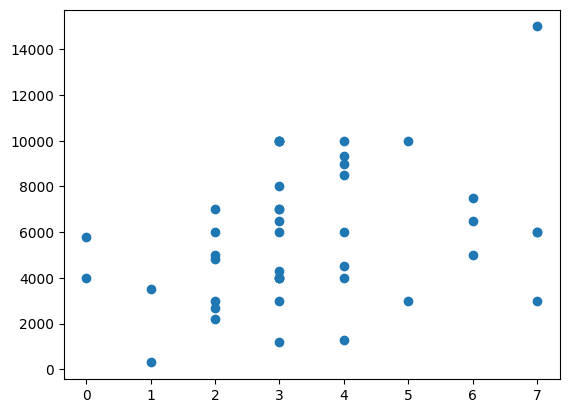

In [30]:
print(stats.pearsonr(nonulls.siblings, nonulls.steps))
plt.scatter(nonulls.siblings, nonulls.steps);

PearsonRResult(statistic=0.16213792012371306, pvalue=0.29891034973771646)


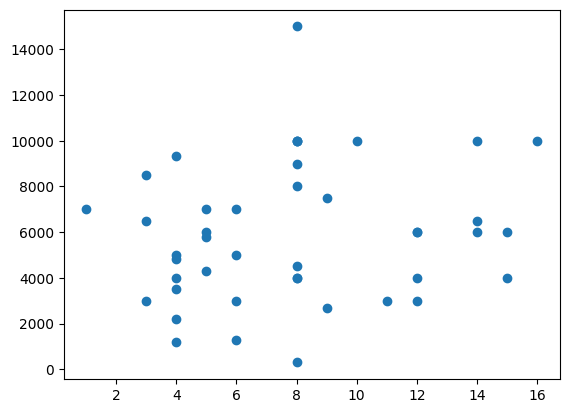

In [31]:
print(stats.pearsonr(nonulls.waterCups, nonulls.steps))
plt.scatter(nonulls.waterCups, nonulls.steps);


PearsonRResult(statistic=-0.20223563262292768, pvalue=0.1313867712861367)


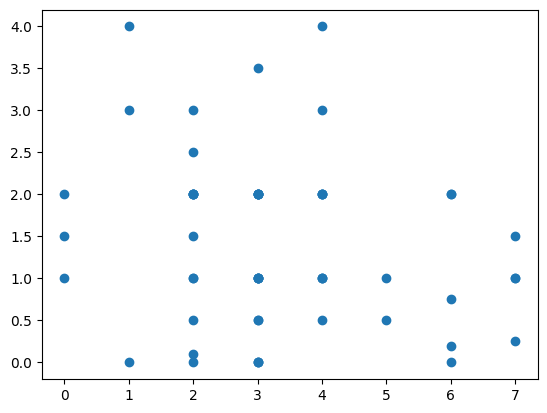

In [32]:
print(stats.pearsonr(cleaned_class_df.siblings, cleaned_class_df.socialMedia))
plt.scatter(cleaned_class_df.siblings, cleaned_class_df.socialMedia);

In [33]:
cleaned_class_df

,favColor,sleepHours,toothbrush,waterCups,phoneType,steps,languages,countries,music,season,socialMedia,books,siblings,instruments,mornOrNight,pets,eatOut
0,white,5.000000,Purple,8,Android,300.0,2,5,Percussion,winter,3.00,2,1,2,night,0,3
1,blue,7.500000,White,8,Apple,NaN,2,5,No preference,spring,0.00,3,6,3,morning,0,1
2,green,7.000000,Green,8,Apple,10000.0,1,6,Classical,spring,2.00,15,3,0,morning,0,2
3,blue,7.500000,Green,8,Apple,10000.0,1,4,Pop,spring,2.00,5,3,2,morning,0,2
4,blue,7.500000,Pink,6,Apple,7000.0,2,13,No preference,fall,1.00,5,3,1,morning,0,1
5,green,8.000000,White,16,Apple,NaN,2,15,Country,fall,1.50,6,2,0,morning,0,10
6,grey,8.250000,Pink,12,Apple,4000.0,2,5,Pop,spring,0.00,20,3,3,morning,12,0
7,blue,9.000000,White,3,Apple,NaN,2,6,Pop,spring,0.00,21,2,0,morning,0,1
8,pink,6.000000,Pink,5,Apple,7000.0,1,4,Country,summer,2.00,1,3,0,night,0,3
9,blue,8.000000,Purple,4,Apple,NaN,1,6,Indie,spring,2.00,3,4,4,morning,0,1


NameError: name 'sns' is not defined

In [ ]:
appleSleep = cleaned_class_df[cleaned_class_df.phoneType == 'Apple']['sleepHours']
androidSleep = cleaned_class_df[cleaned_class_df.phoneType == 'Android']['sleepHours']

from scipy import stats

stats.ttest_ind(appleSleep, androidSleep)

TtestResult(statistic=2.249974756041551, pvalue=0.028471581813577267, df=55.0)

In [ ]:
applelang = cleaned_class_df[cleaned_class_df.phoneType == 'Apple']['languages']
androidlang = cleaned_class_df[cleaned_class_df.phoneType == 'Android']['languages']

from scipy import stats

stats.ttest_ind(applelang, androidlang)

TtestResult(statistic=-2.3600646081653314, pvalue=0.0218467434716548, df=55.0)

In [ ]:
androidSleep

0     5.0
23    6.0
25    8.0
47    7.0
49    7.0
50    3.0
53    7.0
55    8.0
Name: sleepHours, dtype: float64

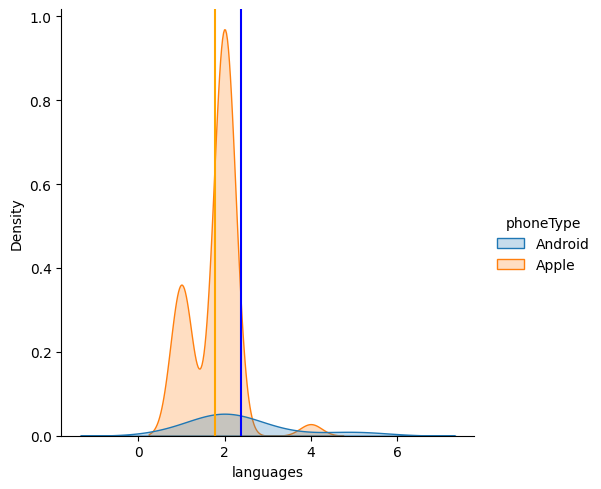

Did purchase bike	$1.78
Did not purchase bike	$2.38


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(cleaned_class_df, x="languages", hue="phoneType", kind='kde', fill=True)
plt.axvline(x=applelang.mean(), color='orange')
plt.axvline(x=androidlang.mean(), color='blue')
plt.show()

print(f'Did purchase bike\t${round(applelang.mean(), 2)}')
print(f'Did not purchase bike\t${round(androidlang.mean(), 2)}')

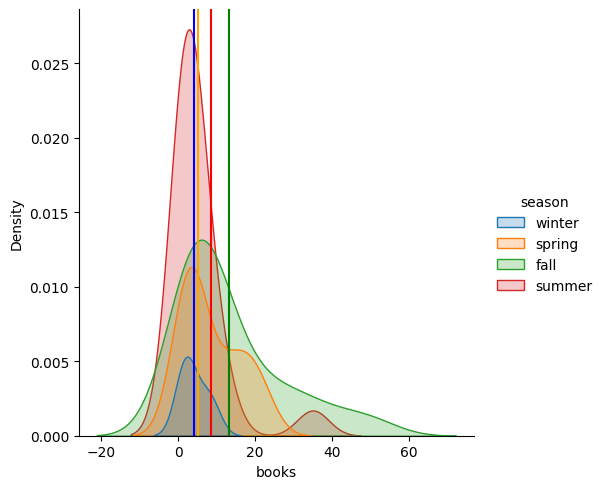

In [37]:
import seaborn as sns
winterbooks = cleaned_class_df[cleaned_class_df['season'] == 'winter']['books']
springbooks = cleaned_class_df[cleaned_class_df['season'] == 'spring']['books']
summerbooks = cleaned_class_df[cleaned_class_df['season'] == 'summer']['books']
fallbooks = cleaned_class_df[cleaned_class_df['season'] == 'fall']['books']


sns.displot(cleaned_class_df, x="books", hue="season", kind='kde', fill=True)
plt.axvline(x=winterbooks.mean(), color='blue')
plt.axvline(x=springbooks.mean(), color='red')
plt.axvline(x=summerbooks.mean(), color='orange')
plt.axvline(x=fallbooks.mean(), color='green')
plt.show()

In [39]:
f, p = stats.f_oneway(winterbooks, fallbooks, springbooks, summerbooks)

print(f'F-stat: {f}')
print(f'p-value:{p}')

F-stat: 2.511504466317944
p-value:0.06847128360227236


In [41]:
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(cleaned_class_df['books'], cleaned_class_df['season'])
print(mc.tukeyhsd())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  fall spring  -4.7381 0.5749 -14.4998  5.0236  False
  fall summer  -8.1905 0.0554 -16.5153  0.1344  False
  fall winter  -9.2381 0.4615 -25.8878  7.4116  False
spring summer  -3.4524 0.7846 -13.2141  6.3094  False
spring winter     -4.5 0.9022 -21.9126 12.9126  False
summer winter  -1.0476 0.9983 -17.6973 15.6021  False
-----------------------------------------------------


In [35]:
cleaned_class_df

,favColor,sleepHours,toothbrush,waterCups,phoneType,steps,languages,countries,music,season,socialMedia,books,siblings,instruments,mornOrNight,pets,eatOut
0,white,5.000000,Purple,8,Android,300.0,2,5,Percussion,winter,3.00,2,1,2,night,0,3
1,blue,7.500000,White,8,Apple,NaN,2,5,No preference,spring,0.00,3,6,3,morning,0,1
2,green,7.000000,Green,8,Apple,10000.0,1,6,Classical,spring,2.00,15,3,0,morning,0,2
3,blue,7.500000,Green,8,Apple,10000.0,1,4,Pop,spring,2.00,5,3,2,morning,0,2
4,blue,7.500000,Pink,6,Apple,7000.0,2,13,No preference,fall,1.00,5,3,1,morning,0,1
5,green,8.000000,White,16,Apple,NaN,2,15,Country,fall,1.50,6,2,0,morning,0,10
6,grey,8.250000,Pink,12,Apple,4000.0,2,5,Pop,spring,0.00,20,3,3,morning,12,0
7,blue,9.000000,White,3,Apple,NaN,2,6,Pop,spring,0.00,21,2,0,morning,0,1
8,pink,6.000000,Pink,5,Apple,7000.0,1,4,Country,summer,2.00,1,3,0,night,0,3
9,blue,8.000000,Purple,4,Apple,NaN,1,6,Indie,spring,2.00,3,4,4,morning,0,1
